**Exploratory Data Analysis - Terroist-EDA-Story board**

**Author - BHUSHAN SAGAR**

Analyzing Data based on :

A] Year

B] Region

C] Country

D] City

E] Terrorist Group

F] Target

G] Humanity Affected (World-wide)

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Importing the Data from Dataset**

In [3]:
data=pd.read_csv("globalterrorismdb_0718dist.csv", encoding="latin1")
df=pd.DataFrame(data)
print("Data has been successfully imported")
df.head()

Data has been successfully imported


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,31,33,76,94,96) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0.0,0.0,0.0,0.0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0.0,1.0,1.0,1.0,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9.0,-9.0,1.0,1.0,NaN


In [4]:
df.shape

(5096, 135)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Columns: 135 entries, eventid to related
dtypes: float64(64), int64(17), object(54)
memory usage: 5.2+ MB


In [6]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [7]:
for i in df.columns:
    print(i,end=", ")

eventid, iyear, imonth, iday, approxdate, extended, resolution, country, country_txt, region, region_txt, provstate, city, latitude, longitude, specificity, vicinity, location, summary, crit1, crit2, crit3, doubtterr, alternative, alternative_txt, multiple, success, suicide, attacktype1, attacktype1_txt, attacktype2, attacktype2_txt, attacktype3, attacktype3_txt, targtype1, targtype1_txt, targsubtype1, targsubtype1_txt, corp1, target1, natlty1, natlty1_txt, targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3, natlty3_txt, gname, gsubname, gname2, gsubname2, gname3, gsubname3, motive, guncertain1, guncertain2, guncertain3, individual, nperps, nperpcap, claimed, claimmode, claimmode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt, compclaim, weaptype1, weaptype1_txt, weapsubtype1, weapsubtype1_txt, weaptype2, weaptype2_txt, weapsubtype2

In [8]:
df=df[["iyear","imonth","iday","country_txt","region_txt","provstate","city",
       "latitude","longitude","location","summary","attacktype1_txt","targtype1_txt",
       "gname","motive","weaptype1_txt","nkill","nwound","addnotes"]]
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,location,summary,attacktype1_txt,targtype1_txt,gname,motive,weaptype1_txt,nkill,nwound,addnotes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [9]:
df.rename(columns={"iyear":"Year","imonth":"Month","iday":"Day","country_txt":"Country",
                   "region_txt":"Region","provstate":"Province/State","city":"City",
                   "latitude":"Latitude","longitude":"Longitude","location":"Location",
                   "summary":"Summary","attacktype1_txt":"Attack Type","targtype1_txt":"Target Type",
                   "gname":"Group Name","motive":"Motive","weaptype1_txt":"Weapon Type",
                   "nkill":"Killed","nwound":"Wounded","addnotes":"Add Notes"},inplace=True)

df.head()

,Year,Month,Day,Country,Region,Province/State,City,Latitude,Longitude,Location,Summary,Attack Type,Target Type,Group Name,Motive,Weapon Type,Killed,Wounded,Add Notes
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,NaN,NaN,Assassination,Private Citizens & Property,MANO-D,NaN,Unknown,1.0,0.0,NaN
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,NaN,NaN,Hostage Taking (Kidnapping),Government (Diplomatic),23rd of September Communist League,NaN,Unknown,0.0,0.0,NaN
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,NaN,NaN,Assassination,Journalists & Media,Unknown,NaN,Unknown,1.0,0.0,NaN
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Bombing/Explosion,Government (Diplomatic),Unknown,NaN,Explosives,NaN,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Facility/Infrastructure Attack,Government (Diplomatic),Unknown,NaN,Incendiary,NaN,NaN,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5096 entries, 0 to 5095
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            5096 non-null   int64  
 1   Month           5096 non-null   int64  
 2   Day             5096 non-null   int64  
 3   Country         5096 non-null   object 
 4   Region          5096 non-null   object 
 5   Province/State  5083 non-null   object 
 6   City            5096 non-null   object 
 7   Latitude        5006 non-null   float64
 8   Longitude       5006 non-null   float64
 9   Location        515 non-null    object 
 10  Summary         798 non-null    object 
 11  Attack Type     5096 non-null   object 
 12  Target Type     5095 non-null   object 
 13  Group Name      5095 non-null   object 
 14  Motive          536 non-null    object 
 15  Weapon Type     5095 non-null   object 
 16  Killed          4484 non-null   float64
 17  Wounded         3308 non-null   f

In [11]:
df.shape

(5096, 19)

In [12]:
df.isnull().sum()

Year                 0
Month                0
Day                  0
Country              0
Region               0
Province/State      13
City                 0
Latitude            90
Longitude           90
Location          4581
Summary           4298
Attack Type          0
Target Type          1
Group Name           1
Motive            4560
Weapon Type          1
Killed             612
Wounded           1788
Add Notes         4516
dtype: int64

In [13]:
df["Killed"]=df["Killed"].fillna(0)
df["Wounded"]=df["Wounded"].fillna(0)
df["Casualty"]=df["Killed"]+df["Wounded"]
df.describe()

,Year,Month,Day,Latitude,Longitude,Killed,Wounded,Casualty
count,5096.000000,5096.000000,5096.000000,5006.000000,5006.000000,5096.000000,5096.000000,5096.000000
mean,1973.809066,6.158359,15.303375,36.559454,-26.458558,0.647567,0.719192,1.366758
std,2.337862,3.293888,9.140459,22.836022,51.475161,3.033054,7.164589,8.232747
min,1970.000000,0.000000,0.000000,-43.532054,-157.818968,0.000000,0.000000,0.000000
25%,1972.000000,3.000000,7.000000,35.800916,-73.931351,0.000000,0.000000,0.000000
50%,1974.000000,6.000000,15.000000,41.400635,-5.956210,0.000000,0.000000,0.000000
75%,1976.000000,9.000000,23.000000,52.501530,7.519113,1.000000,0.000000,1.000000
max,1977.000000,12.000000,31.000000,59.332788,172.636225,92.000000,285.000000,295.000000


**Representation of the Data**

**A] Attacks based on Each Year**

In [14]:
attacks=df["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head() #Number of Attacks in each year

,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581


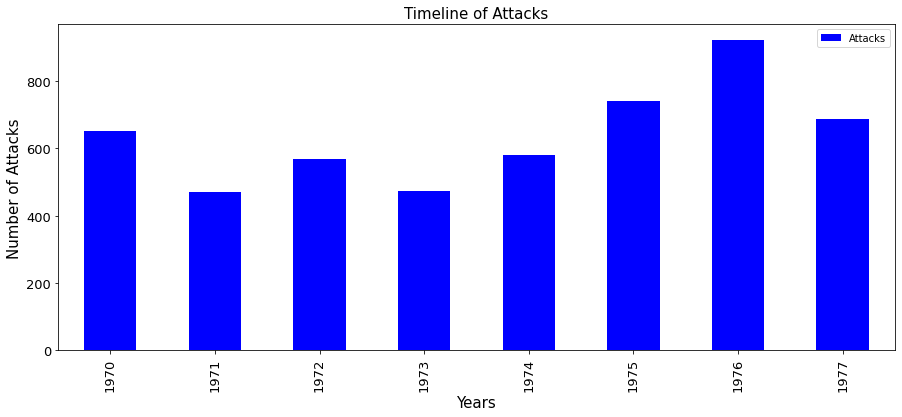

In [15]:
attacks.plot(kind="bar",color="b",figsize=(15,6),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("Years",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

In [16]:
yc=df[["Year","Casualty"]].groupby("Year").sum()
yc.head() #Total Casualties (Killed + Wounded) in each Year

,Casualty
Year,
1970,386.0
1971,255.0
1972,975.0
1973,865.0
1974,1404.0


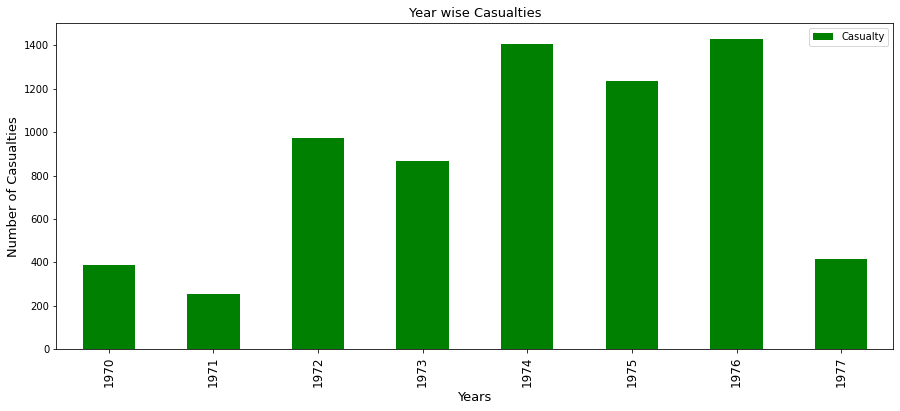

In [17]:
yc.plot(kind="bar",color="g",figsize=(15,6))
plt.title("Year wise Casualties",fontsize=13)
plt.xlabel("Years",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [18]:
yk=df[["Year","Killed"]].groupby("Year").sum()
yk.head() #Killed in each year

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


In [19]:
yw=df[["Year","Wounded"]].groupby("Year").sum()
yw.head() #Wounded in each year

,Wounded
Year,
1970,212.0
1971,82.0
1972,409.0
1973,495.0
1974,865.0


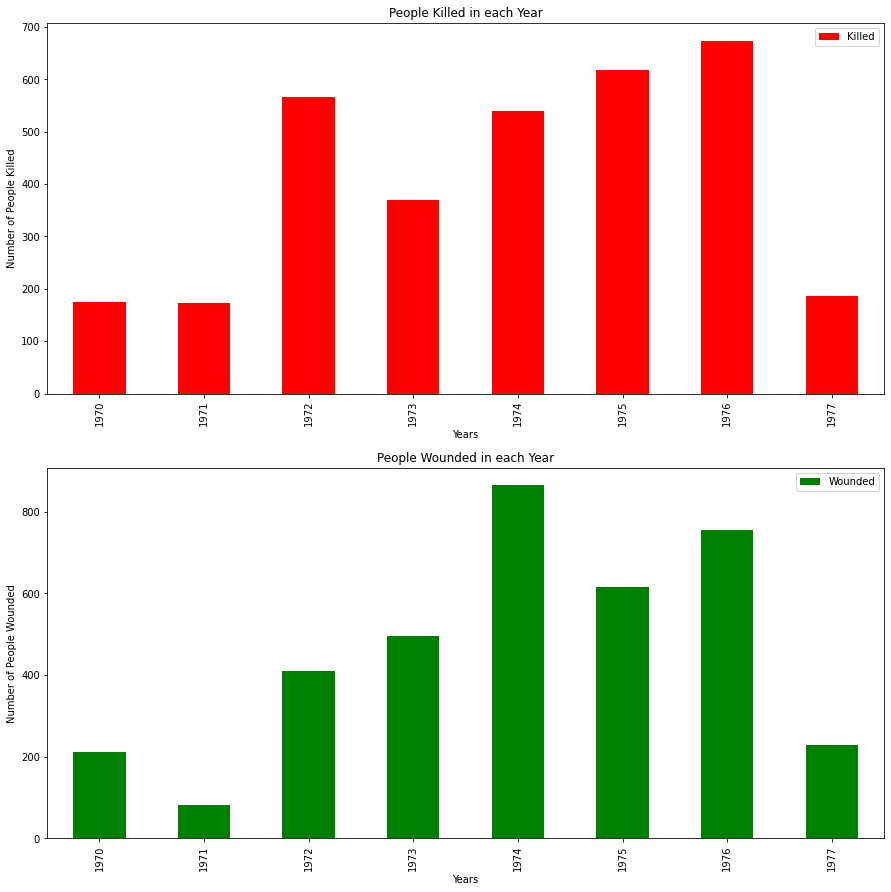

In [20]:
fig=plt.figure()
ax0=fig.add_subplot(2,1,1)
ax1=fig.add_subplot(2,1,2)

#Killed
yk.plot(kind="bar",color="r",figsize=(15,15),ax=ax0)
ax0.set_title("People Killed in each Year")
ax0.set_xlabel("Years")
ax0.set_ylabel("Number of People Killed") 

#Wounded
yw.plot(kind="bar",color="g",figsize=(15,15),ax=ax1)
ax1.set_title("People Wounded in each Year")
ax1.set_xlabel("Years")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**B] Attacks based on Region**

In [21]:
reg=pd.crosstab(df.Year,df.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,
1970,1,7,2,12,28,472,65,1,10,3,50
1971,1,5,1,5,55,247,24,0,6,2,125
1972,8,3,0,1,53,73,33,1,16,4,376
1973,1,6,2,1,19,64,83,1,2,4,290
1974,1,11,4,2,42,111,81,2,3,7,317


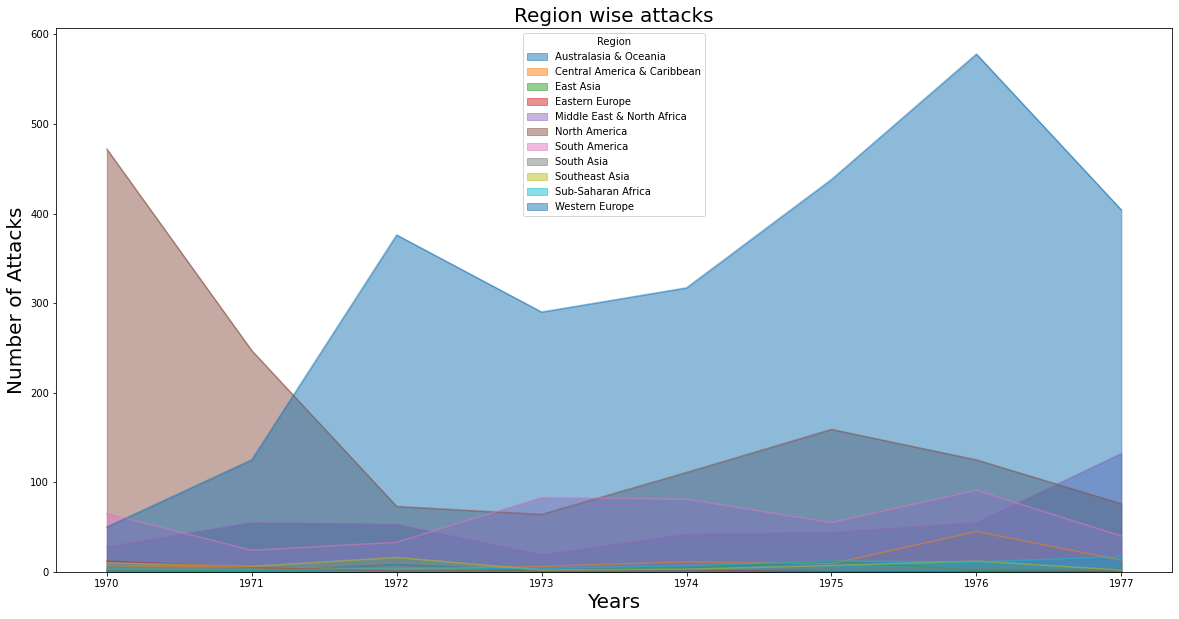

In [22]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

In [23]:
regt=reg.transpose()
regt["Total"]=regt.sum(axis=1)
ra=regt["Total"].sort_values(ascending=False)
ra

Region
Western Europe                 2578
North America                  1327
South America                   472
Middle East & North Africa      428
Central America & Caribbean      99
Sub-Saharan Africa               60
Southeast Asia                   58
East Asia                        26
Eastern Europe                   22
South Asia                       14
Australasia & Oceania            12
Name: Total, dtype: int64

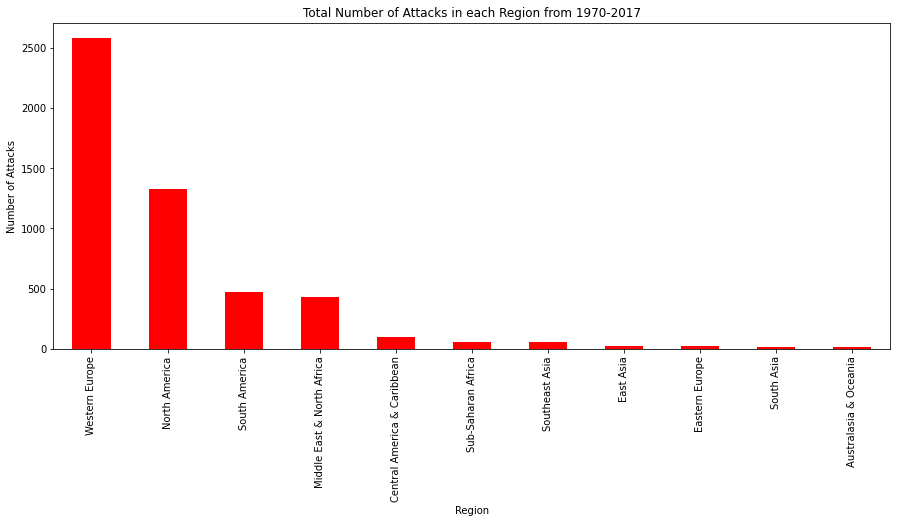

In [24]:
ra.plot(kind="bar",color="r",figsize=(15,6))
plt.title("Total Number of Attacks in each Region from 1970-2017")
plt.xlabel("Region")
plt.ylabel("Number of Attacks")
plt.show()

In [25]:
rc=df[["Region","Casualty"]].groupby("Region").sum().sort_values(by="Casualty",ascending=False)
rc #Total Casualties (Killed + Wounded) in each Region

,Casualty
Region,
Western Europe,3745.0
Middle East & North Africa,1130.0
North America,788.0
South America,514.0
Southeast Asia,353.0
Sub-Saharan Africa,168.0
Central America & Caribbean,147.0
Eastern Europe,43.0
East Asia,38.0


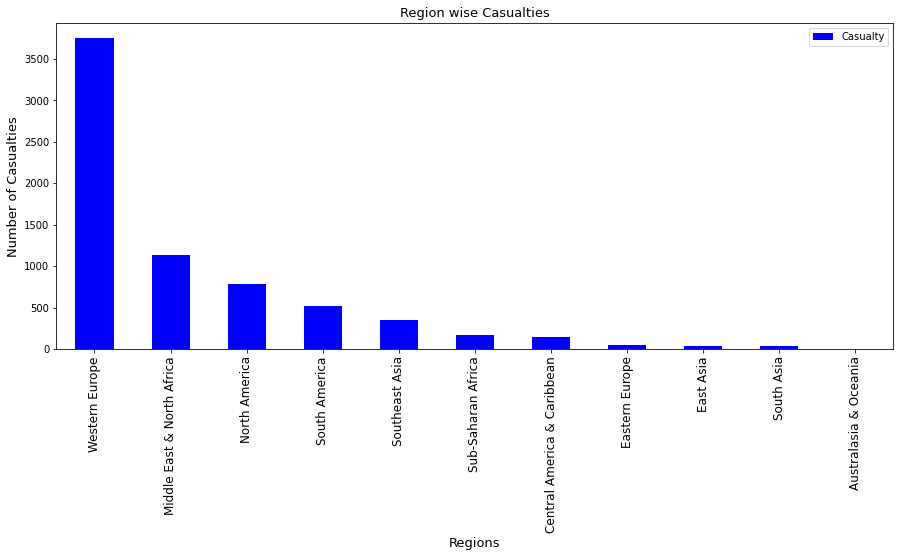

In [26]:
rc.plot(kind="bar",color="b",figsize=(15,6))
plt.title("Region wise Casualties",fontsize=13)
plt.xlabel("Regions",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [27]:
rk=df[["Region","Killed"]].groupby("Region").sum().sort_values(by="Killed",ascending=False)
rk #killed in each region

,Killed
Region,
Western Europe,2051.0
South America,327.0
Middle East & North Africa,258.0
North America,228.0
Southeast Asia,180.0
Central America & Caribbean,125.0
Sub-Saharan Africa,62.0
Eastern Europe,29.0
East Asia,28.0


In [28]:
rw=df[["Region","Wounded"]].groupby("Region").sum().sort_values(by="Wounded",ascending=False)
rw #wounded in each region

,Wounded
Region,
Western Europe,1694.0
Middle East & North Africa,872.0
North America,560.0
South America,187.0
Southeast Asia,173.0
Sub-Saharan Africa,106.0
South Asia,27.0
Central America & Caribbean,22.0
Eastern Europe,14.0


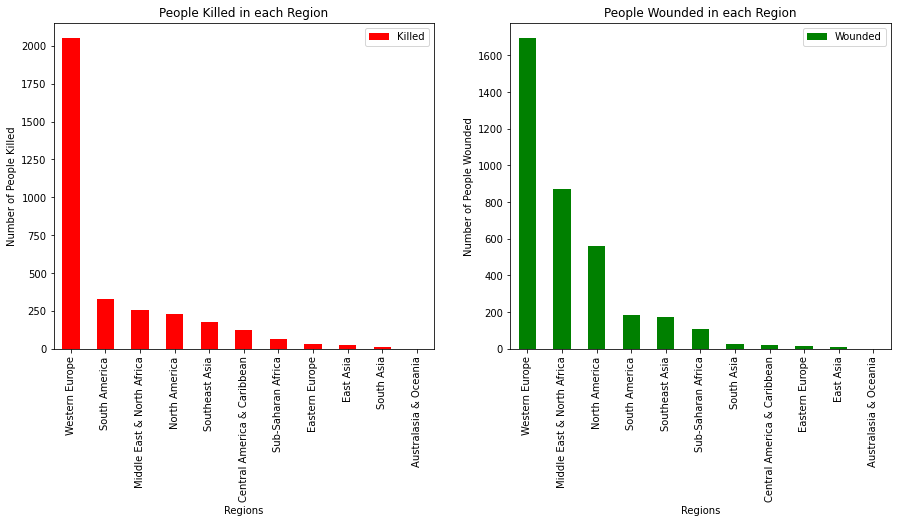

In [29]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
rk.plot(kind="bar",color="r",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Region")
ax0.set_xlabel("Regions")
ax0.set_ylabel("Number of People Killed")

#Wounded
rw.plot(kind="bar",color="g",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Region")
ax1.set_xlabel("Regions")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**C] Attacks based on Country**

In [30]:
ct=df["Country"].value_counts().head(10)
ct

United States         1259
United Kingdom        1245
Italy                  368
Spain                  345
Argentina              279
West Germany (FRG)     225
Turkey                 222
France                 178
Greece                  82
Iran                    67
Name: Country, dtype: int64

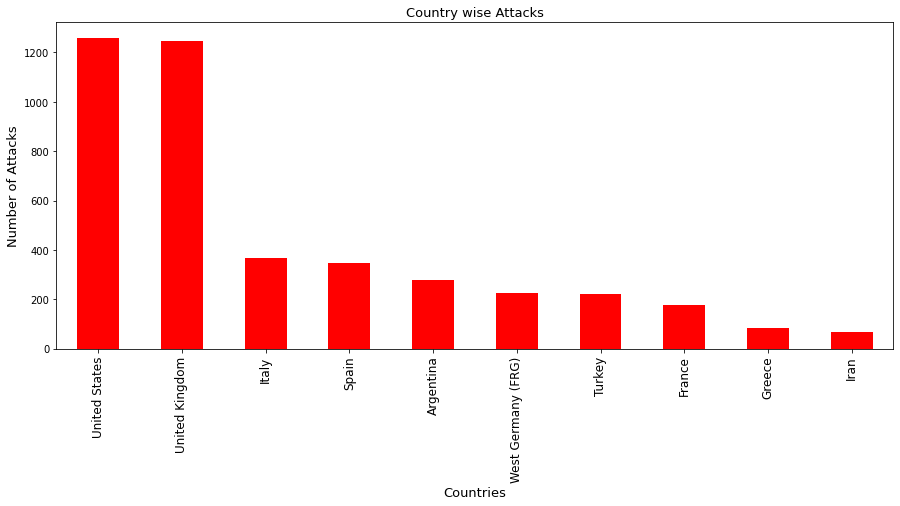

In [31]:
ct.plot(kind="bar",color="r",figsize=(15,6))
plt.title("Country wise Attacks",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [32]:
cnc=df[["Country","Casualty"]].groupby("Country").sum().sort_values(by="Casualty",ascending=False)
cnc.head(10) #Total Casualties (Killed + Wounded) in each Country

,Casualty
Country,
United Kingdom,2517.0
United States,697.0
Israel,502.0
Argentina,432.0
Italy,374.0
Iraq,298.0
Philippines,226.0
Spain,216.0
Greece,170.0


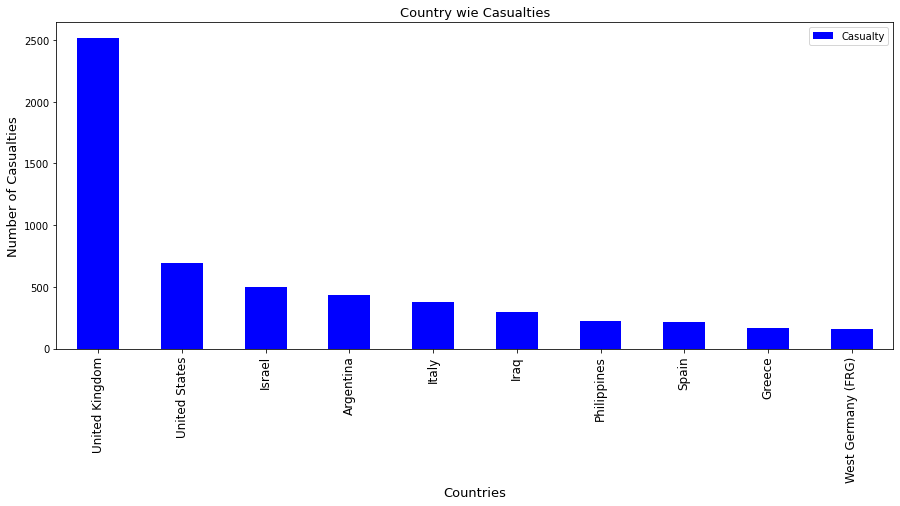

In [33]:
cnc[:10].plot(kind="bar",color="b",figsize=(15,6))
plt.title("Country wie Casualties",fontsize=13)
plt.xlabel("Countries",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [34]:
cnk=df[["Country","Killed"]].groupby("Country").sum().sort_values(by="Killed",ascending=False)
cnk.head(10) #killed in each country

,Killed
Country,
United Kingdom,1537.0
Argentina,298.0
United States,154.0
Israel,132.0
Greece,114.0
Italy,103.0
Spain,99.0
Philippines,94.0
South Vietnam,81.0


In [35]:
cnw=df[["Country","Wounded"]].groupby("Country").sum().sort_values(by="Wounded",ascending=False)
cnw.head(10) #wounded in each country

,Wounded
Country,
United Kingdom,980.0
United States,543.0
Israel,370.0
Iraq,286.0
Italy,271.0
Argentina,134.0
Philippines,132.0
Spain,117.0
West Germany (FRG),115.0


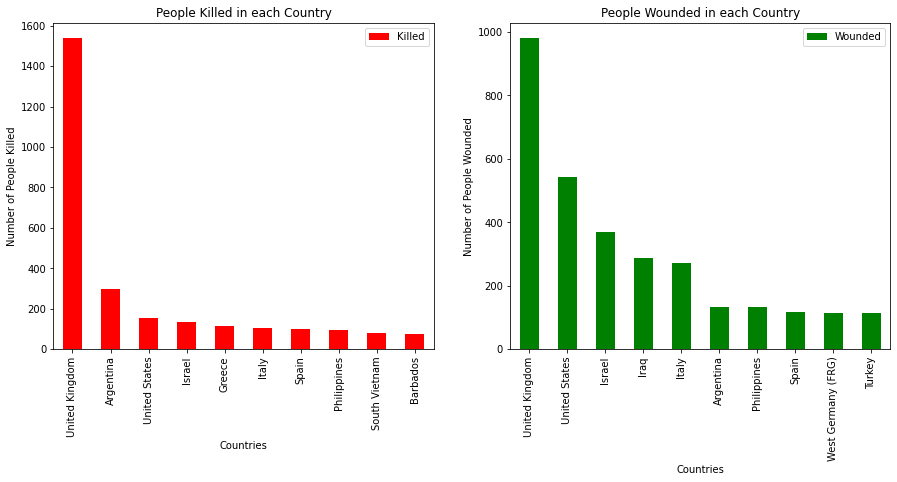

In [36]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
cnk[:10].plot(kind="bar",color="r",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each Country")
ax0.set_xlabel("Countries")
ax0.set_ylabel("Number of People Killed")

#Wounded
cnw[:10].plot(kind="bar",color="g",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each Country")
ax1.set_xlabel("Countries")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**D] Attacks based on City**

In [37]:
city=df["City"].value_counts()[1:11]
city

New York City    282
Buenos Aires     163
Rome             132
Unknown          118
Paris            109
Madrid           101
San Francisco     82
London            80
Ankara            80
Athens            72
Name: City, dtype: int64

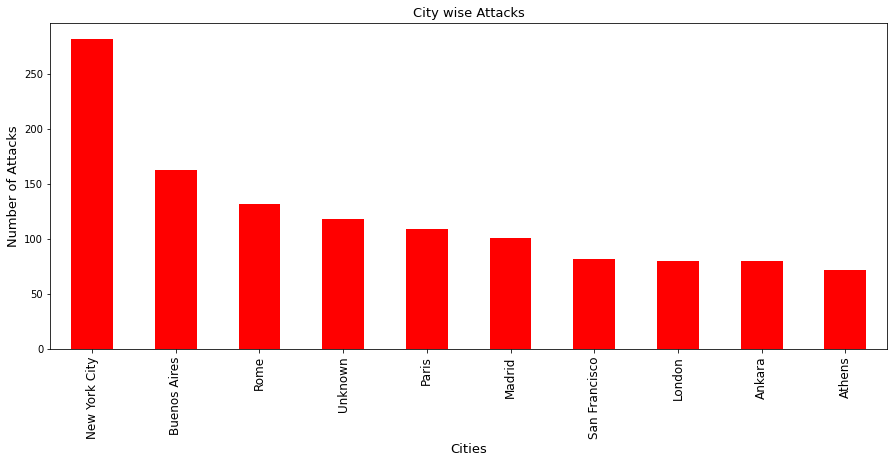

In [38]:
city.plot(kind="bar",color="r",figsize=(15,6))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [39]:
cc=df[["City","Casualty"]].groupby("City").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
cc.head(10) #Total Casualties (Killed + Wounded) in each City

,Casualty
City,
Belfast,984.0
London,499.0
Buenos Aires,309.0
Baghdad,297.0
New York City,269.0
Birmingham,184.0
Athens,168.0
Jerusalem,155.0
Rome,138.0


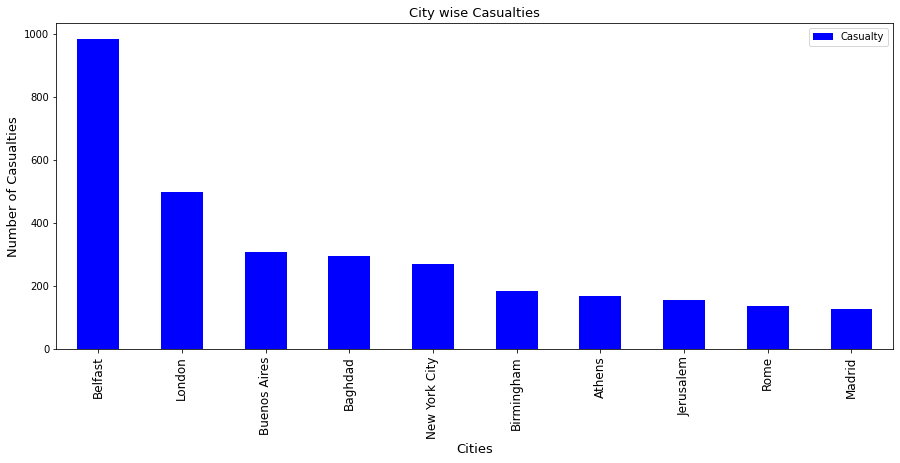

In [40]:
cc[:10].plot(kind="bar",color="b",figsize=(15,6))
plt.title("City wise Casualties",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [41]:
ck=df[["City","Killed"]].groupby("City").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
ck.head(10) #killed in each city

,Killed
City,
Belfast,780.0
Buenos Aires,200.0
Athens,112.0
Pleiku,81.0
Grantly Adams International Airport,73.0
Londonderry,72.0
Rome,69.0
Madrid,48.0
Mexico City,48.0


In [42]:
cw=df[["City","Wounded"]].groupby("City").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
cw.head(10) #wounded in each city

,Wounded
City,
London,468.0
Baghdad,285.0
New York City,232.0
Belfast,204.0
Birmingham,162.0
Jerusalem,143.0
Buenos Aires,109.0
Istanbul,105.0
Brescia,104.0


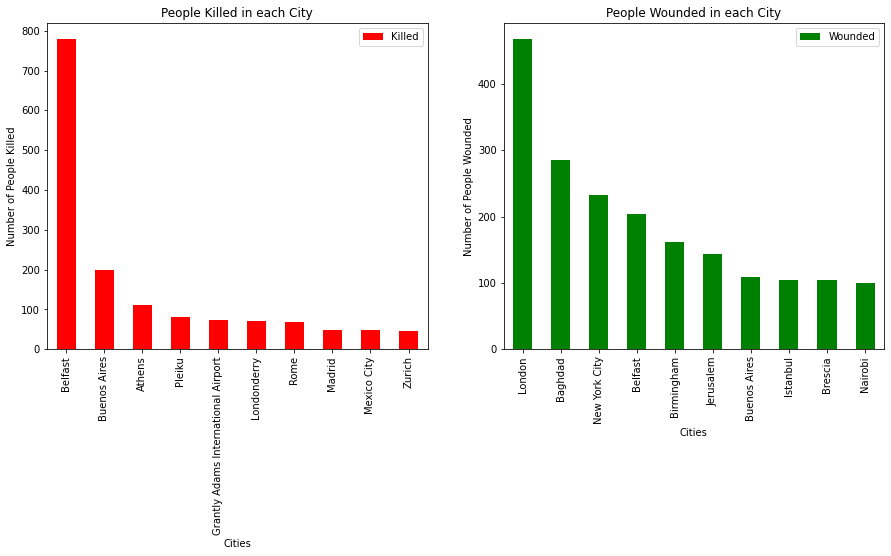

In [43]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
ck[:10].plot(kind="bar",color="r",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed in each City")
ax0.set_xlabel("Cities")
ax0.set_ylabel("Number of People Killed")

#Wounded
cw[:10].plot(kind="bar",color="g",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded in each City")
ax1.set_xlabel("Cities")
ax1.set_ylabel("Number of People Wounded")

plt.show()

**E] Attacks based on Terrorist Group**

In [44]:
grp=df["Group Name"].value_counts()[1:10]
grp

Irish Republican Army (IRA)            669
Protestant extremists                  184
Left-Wing Militants                    169
Ulster Volunteer Force (UVF)           159
Black September                        120
Basque Fatherland and Freedom (ETA)    103
Ulster Freedom Fighters (UFF)           90
Montoneros (Argentina)                  88
Black Nationalists                      82
Name: Group Name, dtype: int64

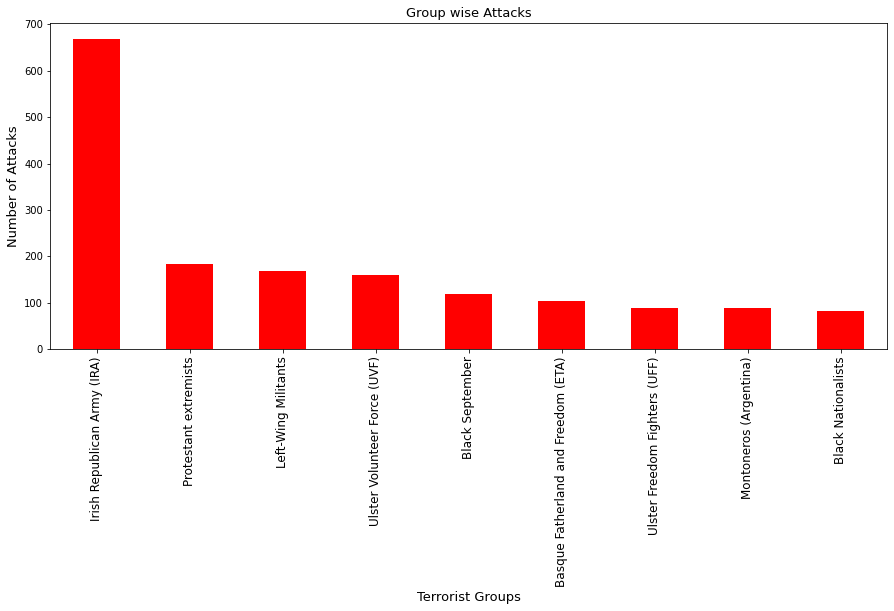

In [45]:
grp.plot(kind="bar",color="r",figsize=(15,6))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [46]:
gc=df[["Group Name","Casualty"]].groupby("Group Name").sum().sort_values(by="Casualty",ascending=False).drop("Unknown")
gc.head(10) #Total Casualties(Killed + Wounded) by each Group

,Casualty
Group Name,
Irish Republican Army (IRA),1715.0
Montoneros (Argentina),296.0
Ulster Volunteer Force (UVF),269.0
Popular Front for the Liberation of Palestine (PFLP),260.0
Protestant extremists,217.0
Black September,199.0
Democratic Front for the Liberation of Palestine (DFLP),188.0
Black Order,173.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",156.0


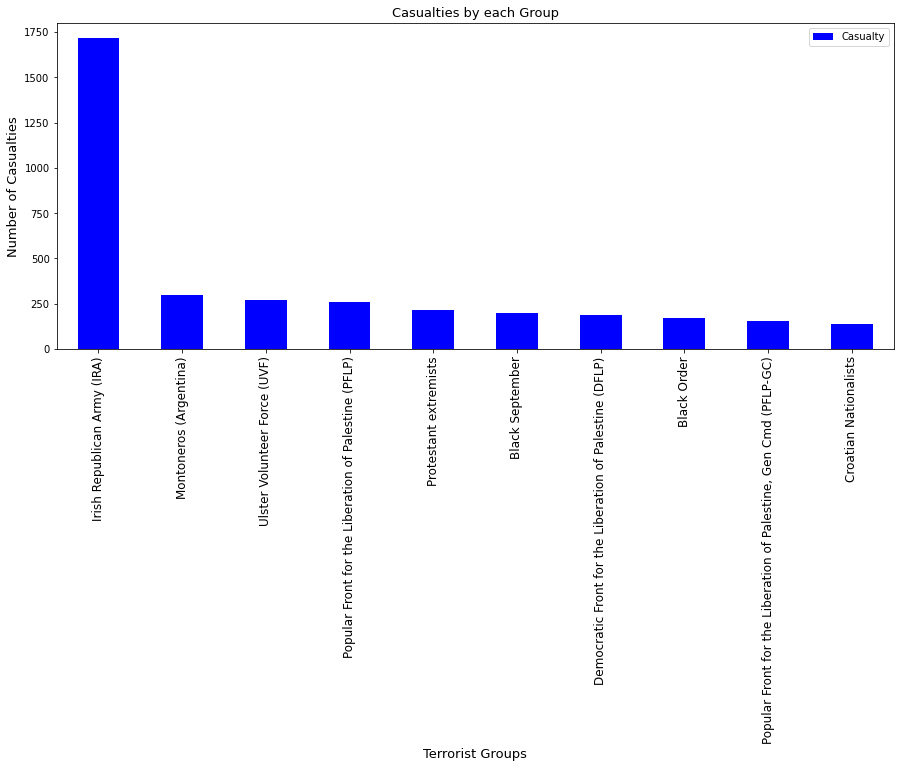

In [47]:
gc.head(10).plot(kind="bar",color="b",figsize=(15,6))
plt.title("Casualties by each Group",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [48]:
gk=df[["Group Name","Killed"]].groupby("Group Name").sum().sort_values(by="Killed",ascending=False).drop("Unknown")
gk.head(10) #killed by each group

,Killed
Group Name,
Irish Republican Army (IRA),812.0
Ulster Volunteer Force (UVF),268.0
Protestant extremists,217.0
Montoneros (Argentina),187.0
"Popular Front for the Liberation of Palestine, Gen Cmd (PFLP-GC)",156.0
Ulster Freedom Fighters (UFF),103.0
Black September,77.0
Coordination of the United Revolutionary Organization (CORU),75.0
Irish Republican Extremists,75.0


In [49]:
gw=df[["Group Name","Wounded"]].groupby("Group Name").sum().sort_values(by="Wounded",ascending=False).drop("Unknown")
gw.head(10)

,Wounded
Group Name,
Irish Republican Army (IRA),903.0
Popular Front for the Liberation of Palestine (PFLP),205.0
Black Order,152.0
Democratic Front for the Liberation of Palestine (DFLP),150.0
Black September,122.0
Montoneros (Argentina),109.0
Maskini Liberation Front,100.0
Croatian Nationalists,98.0
Basque Fatherland and Freedom (ETA),84.0


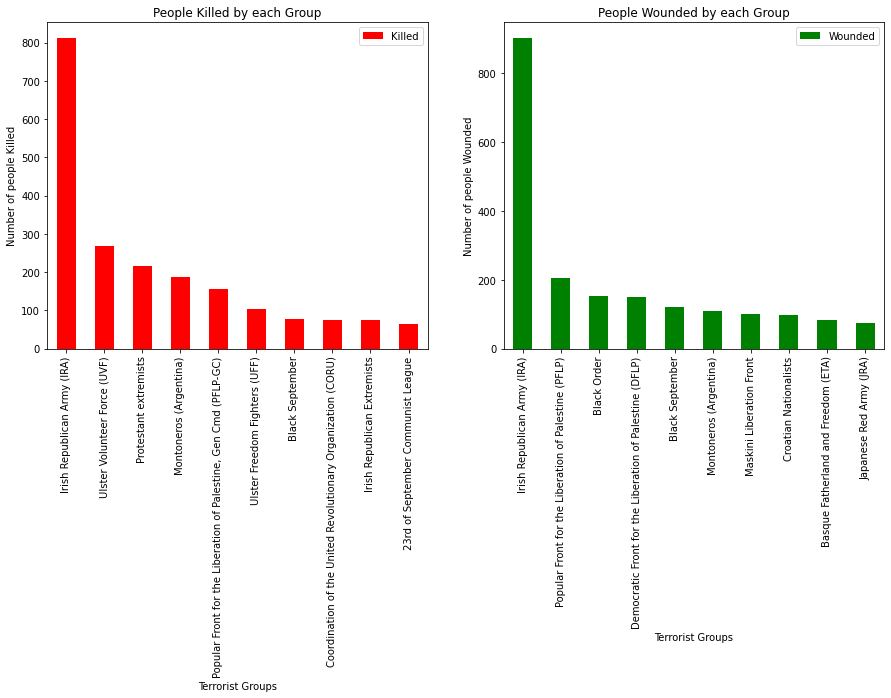

In [50]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
gk[:10].plot(kind="bar",color="r",figsize=(15,6),ax=ax0)
ax0.set_title("People Killed by each Group")
ax0.set_xlabel("Terrorist Groups")
ax0.set_ylabel("Number of people Killed")

#Wounded
gw[:10].plot(kind="bar",color="g",figsize=(15,6),ax=ax1)
ax1.set_title("People Wounded by each Group")
ax1.set_xlabel("Terrorist Groups")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**F] Attacks based on Target**

In [51]:
ta=df["Target Type"].value_counts()
ta

Business                          1201
Private Citizens & Property        905
Military                           678
Government (Diplomatic)            493
Government (General)               472
Police                             437
Airports & Aircraft                179
Educational Institution            160
Journalists & Media                113
Terrorists/Non-State Militia       100
Utilities                           92
Transportation                      86
Religious Figures/Institutions      47
NGO                                 25
Telecommunication                   22
Violent Political Party             21
Tourists                            18
Maritime                            17
Unknown                             15
Other                                7
Food or Water Supply                 5
Abortion Related                     2
Name: Target Type, dtype: int64

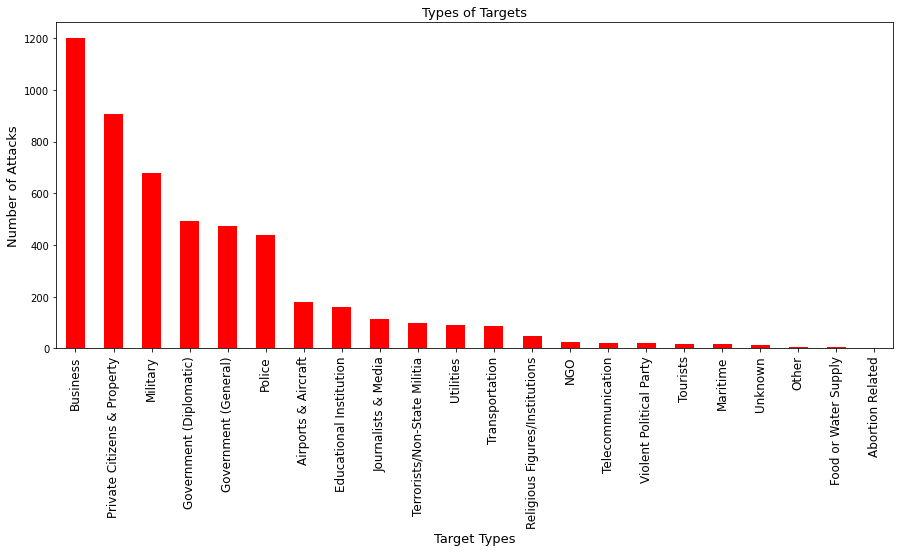

In [52]:
ta.plot(kind="bar",color="r",figsize=(15,6))
plt.title("Types of Targets",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

In [53]:
tc=df[["Target Type","Casualty"]].groupby("Target Type").sum().sort_values(by="Casualty",ascending=False)
tc #Total Casualties(Killed + Wounded) Targeted

,Casualty
Target Type,
Airports & Aircraft,1373.0
Business,1303.0
Private Citizens & Property,1234.0
Military,829.0
Government (General),592.0
Police,504.0
Transportation,285.0
Government (Diplomatic),262.0
Educational Institution,204.0


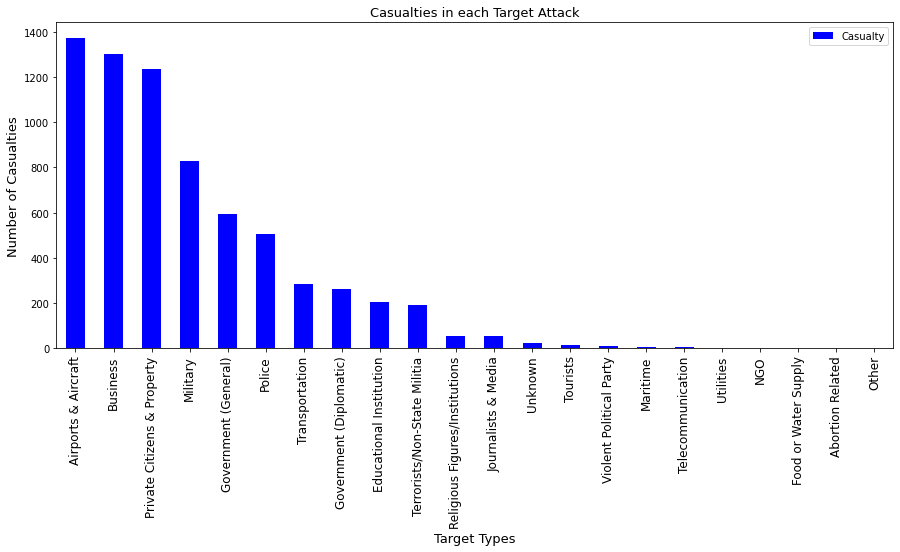

In [54]:
tc.plot(kind="bar",color="b",figsize=(15,6))
plt.title("Casualties in each Target Attack",fontsize=13)
plt.xlabel("Target Types",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Casualties",fontsize=13)
plt.show()

In [55]:
tk=df[["Target Type","Killed"]].groupby("Target Type").sum().sort_values(by="Killed",ascending=False)
tk #killed

,Killed
Target Type,
Private Citizens & Property,857.0
Military,627.0
Airports & Aircraft,551.0
Business,374.0
Police,328.0
Terrorists/Non-State Militia,184.0
Government (General),113.0
Government (Diplomatic),71.0
Transportation,69.0


In [56]:
tw=df[["Target Type","Wounded"]].groupby("Target Type").sum().sort_values(by="Wounded",ascending=False)
tw #wounded

,Wounded
Target Type,
Business,929.0
Airports & Aircraft,822.0
Government (General),479.0
Private Citizens & Property,377.0
Transportation,216.0
Military,202.0
Government (Diplomatic),191.0
Police,176.0
Educational Institution,169.0


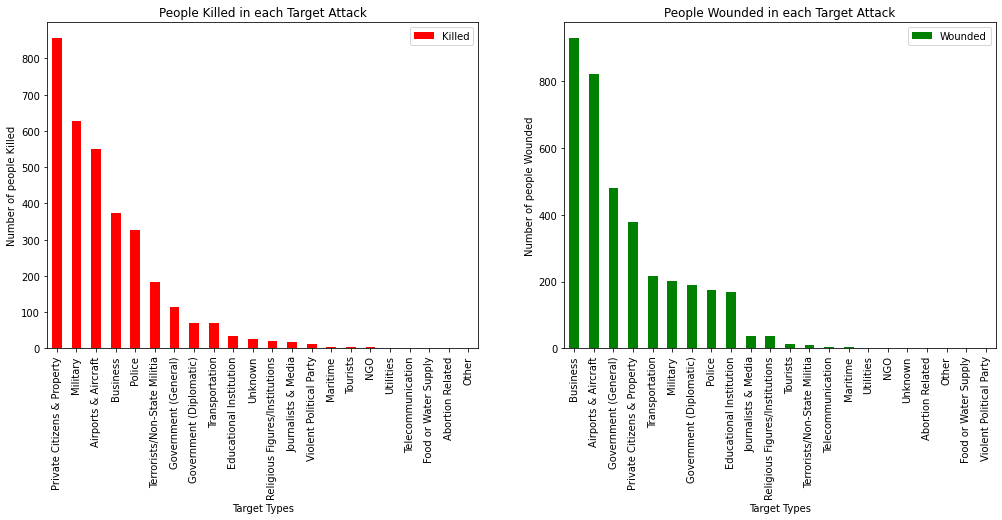

In [57]:
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)

#Killed
tk.plot(kind="bar",color="r",figsize=(17,6),ax=ax0)
ax0.set_title("People Killed in each Target Attack")
ax0.set_xlabel("Target Types")
ax0.set_ylabel("Number of people Killed")

#Wounded
tw.plot(kind="bar",color="g",figsize=(17,6),ax=ax1)
ax1.set_title("People Wounded in each Target Attack")
ax1.set_xlabel("Target Types")
ax1.set_ylabel("Number of people Wounded")
plt.show()

**G] Humanity Affected (World-wide) by Terrorist Attacks from 1970 to 2017**

In [58]:
casualty=df.loc[:,"Casualty"].sum()
print("Total number of Casualties affected due to Terrorist Attacks from 1970 to 2017 across the world :\n",casualty)

Total number of Casualties affected due to Terrorist Attacks from 1970 to 2017 across the world :
 6965.0


In [59]:
kill=df.loc[:,"Killed"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",kill)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 3300.0


In [60]:
wound=df.loc[:,"Wounded"].sum()
print("Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :\n",wound)

Total number of people killed due to Terrorist Attacks from 1970 to 2017 across the world :
 3665.0
